In [9]:
import os
import os.path as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.patches as mpatches
import math
import statistics as stat

# width = 505.89
width = 417.68646

inst_type = ["base", "canon (memstore)", "canon (all)"]
dims = np.array([100, 200, 500, 1000, 2000])
nan_rates = np.array([0, 1, 10, 100])
dim_labels = ["100", "200", "500", "1000", "2000"]

In [10]:
def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.
    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [11]:
def pretty_print(avg_values, nan_rate):
    print(f'===== NaN rate = {nan_rate}=====')
    print("dim,base,canon,denan")
    for i in range(len(dims)):
        print(f'{dims[i]},{avg_values[0][i]},{avg_values[1][i]},{avg_values[2][i]}')

In [12]:
def get_all_files(dir_path):
    all_files = [f for f in os.listdir(dir_path) if path.isfile(path.join(dir_path, f))]
    return all_files

def get_files(all_files, prefix):
    files = []
    for f in all_files:
        if prefix in f:
            files.append(f)
    return files

In [15]:
def plot(dirpath, outdir, nan_rate):
    outfile = f'nan{nan_rate}.pdf'
    outpath = path.join(outdir, outfile)
    colors = ['darkorchid','forestgreen','#DC7A23']
    fig, ax = plt.subplots(1,1,figsize=set_size(width, fraction=1))

    exp_cnt = len(inst_type)
    avg_values = list()
    stddev_values = list()
    min_values = list()
    max_values = list()
    for i in range(exp_cnt):
        avg_values.append(list())
        stddev_values.append(list())
        min_values.append(list())
        max_values.append(list())

    # 0: base, 1: canon, 2: denan
    for d in dims:
        tmp_data = pd.read_csv(path.join(dirpath, f'base_{d}_{nan_rate}.csv'), header=None)
        input_data = tmp_data[10:]
        avg_values[0].append(input_data.mean().tolist()[0])
        stddev_values[0].append(input_data.std().tolist()[0])
        min_values[0].append(input_data.min().tolist()[0])
        max_values[0].append(input_data.max().tolist()[0])
        
        tmp_data = pd.read_csv(path.join(dirpath, f'canon_{d}_{nan_rate}.csv'), header=None)
        input_data = tmp_data[10:]
        avg_values[1].append(input_data.mean().tolist()[0])
        stddev_values[1].append(input_data.std().tolist()[0])
        min_values[1].append(input_data.min().tolist()[0])
        max_values[1].append(input_data.max().tolist()[0])
        
        tmp_data = pd.read_csv(path.join(dirpath, f'denan_{d}_{nan_rate}.csv'), header=None)
        input_data = tmp_data[10:]
        avg_values[2].append(input_data.mean().tolist()[0])
        stddev_values[2].append(input_data.std().tolist()[0])
        min_values[2].append(input_data.min().tolist()[0])
        max_values[2].append(input_data.max().tolist()[0])
        
    for i in range(exp_cnt):
        ax.plot(dims, avg_values[i], marker='x', color=colors[i])
#         plt.errorbar(dims, avg_values[i], yerr=stddev_values[i], marker='x', color=colors[i])
    
#     for i in range(exp_cnt):
#         ax.fill_between(dims, min_values[i], max_values[i], alpha=0.4, color=colors[i])
    
    pretty_print(avg_values, nan_rate)

    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(dims, dims, fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    plt.title(f'NaN rate = {nan_rate}%')
    plt.xlabel("Matrix dimension", fontsize=12)
    plt.ylabel("Latency (s)", fontsize=12)
    
    plt.legend(inst_type, fontsize=12, title_fontsize=12, ncol=1)
    plt.grid(linestyle='--', color='silver', axis='y', linewidth=0.5)
    plt.savefig(outpath, bbox_inches='tight', format='pdf')
#     plt.close(fig)

===== NaN rate = 0=====
dim,base,canon,denan
100,0.004783999999999999,0.006893000000000001,0.017357999999999995
200,0.036372,0.04092,0.098505
500,0.5644739999999999,0.796341,1.8058039999999997
1000,5.654482,7.890561999999998,15.715793
2000,82.34122500000001,95.567924,192.023945
===== NaN rate = 1=====
dim,base,canon,denan
100,0.0035020000000000003,0.007253,0.016733
200,0.033231,0.044599999999999994,0.097918
500,0.5805450000000001,0.8243689999999999,1.8281959999999997
1000,6.124563,8.080414999999999,16.526251
2000,82.624684,102.37597799999999,197.07068800000002
===== NaN rate = 10=====
dim,base,canon,denan
100,0.0037519999999999997,0.00703,0.018179999999999998
200,0.031683,0.042683,0.10631400000000002
500,0.5724220000000001,0.835437,1.9876630000000002
1000,6.095546000000001,8.168947,17.628228
2000,81.599513,103.17578800000001,207.03952800000002
===== NaN rate = 100=====
dim,base,canon,denan
100,0.004801,0.007044,0.017231000000000003
200,0.028182000000000002,0.042561,0.099101
500,0.56417

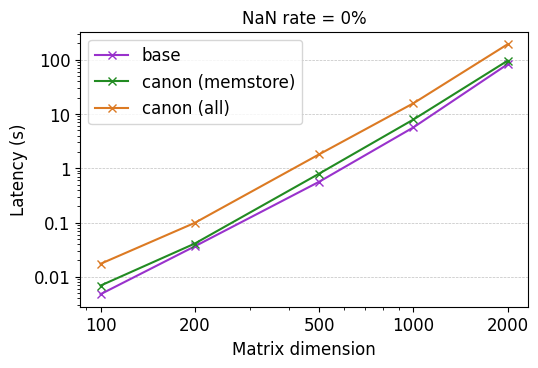

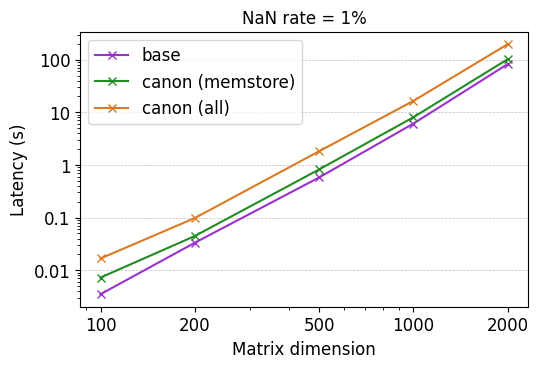

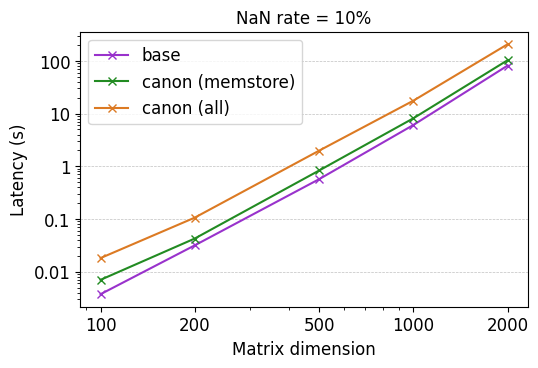

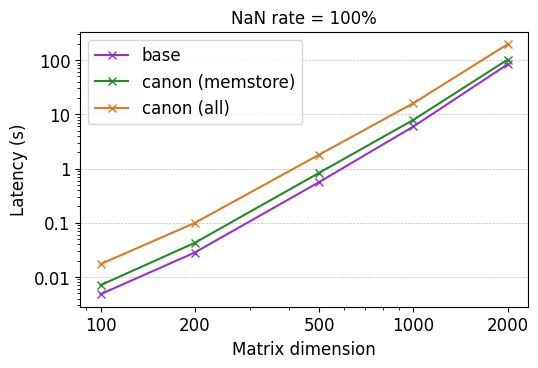

In [16]:
dirpath = "./data/wasm/noinline"
outdir = "./figures/wasm/noinline"
plot(dirpath, outdir, 0)
plot(dirpath, outdir, 1)
plot(dirpath, outdir, 10)
plot(dirpath, outdir, 100)

In [8]:
# dirpath = "./data/wasm/inline"
# outdir = "./figures/wasm/inline"
# plot(dirpath, outdir, 0)
# plot(dirpath, outdir, 1)
# plot(dirpath, outdir, 10)
# plot(dirpath, outdir, 100)